## Jupyter Physics Lab - Quick Demo
Mike Hughes May 2020



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
dt = 10           # Interval between displayed frame in ms

dropHeight = 20   # Height to drop ball from in m
g = 9.81          # Gravitational constant


In [3]:
# Make sure we have enough frames to actually see it hit the ground 
timeToHitGround = np.sqrt(2 * dropHeight/g)
nFrames = int((timeToHitGround / dt * 1000) * 1.1)

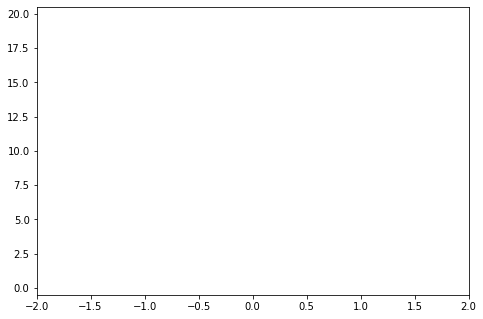

In [4]:
# Create figure and axis that the ball drop will be shown on
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(-2, 2), ylim=(-0.5, dropHeight + .5))

# The ball
ball, = ax.plot([], [], 'bo', ms=5)


In [5]:
def init():
    # This is called when the animation starts
    ball.set_data([], [])
    return ball,

def animate(i):
    # This is called on each step of the animaion (i is iteration number)
    global dt, dropHeight, g
    
    time = i * dt/1000      # Converts iteration number to time. dt is in ms, hence /1000
    
    # Current height of ball
    height = dropHeight - 0.5*g*time**2   # Calculate height
    
    # If we hit the floor, stop
    if height < 0: 
        height = 0
    
    # Put a marker where the ball is
    ball.set_data(0,height)
    
    return ball,

In [6]:
# Create animation and display
anim = animation.FuncAnimation(fig, animate, frames=nFrames,
                              interval=dt, blit=True, init_func=init)
HTML(anim.to_jshtml())
